In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.metrics import r2_score
from matplotlib_venn import venn2

In [3]:
training_results = pd.read_csv("../data/IDX/conversion_results.csv")
training_results

,Unnamed: 0,Name,mz,rt_start,rt_end,Charge,Product mz,CE,RF Lens (V),Training,HRMS_CE,Converted_CE
0,5,Adenine,134.047,2.18,3.22,-1,107.054,17.17,63,1,30.0,15.782998
1,6,Adenine,134.047,2.18,3.22,-1,92.042,19.20,63,1,40.0,21.237720
2,7,Adenine,134.047,2.18,3.22,-1,65.196,28.08,63,1,60.0,32.147164
3,18,Citrate,191.020,8.85,9.32,-1,87.042,16.79,43,1,25.0,15.686111
4,19,Citrate,191.020,8.85,9.32,-1,85.196,15.61,43,1,25.0,15.686111
5,20,Citrate,191.020,8.85,9.32,-1,111.054,12.08,43,1,20.0,12.958750
6,28,Lactate,89.024,1.49,2.51,-1,71.083,9.30,33,1,20.0,8.249539
7,30,Lactate,89.024,1.49,2.51,-1,87.054,8.29,33,1,20.0,8.249539
8,36,Adenosine,268.104,2.12,3.34,1,136.125,19.57,62,1,25.0,19.245122
9,37,Adenosine,268.104,2.12,3.34,1,119.054,47.38,62,1,80.0,49.246093


Text(0.5, 1.0, 'Conversion Cpds: R2 = 0.98')

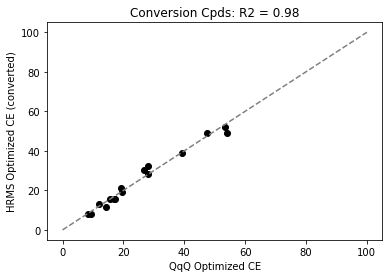

In [4]:
plt.scatter(training_results["CE"],training_results["Converted_CE"],c="black")
plt.plot([0,100],[0,100],linestyle="--",c="grey")
plt.xlabel("")
plt.xlabel("QqQ Optimized CE")
plt.ylabel("HRMS Optimized CE (converted)")
r2 = r2_score(training_results["CE"],training_results["Converted_CE"])
plt.title("Conversion Cpds: R2 = "+str(np.round(r2,2)))

In [5]:
totalTransitionInfoFn = "../data/IDX/M3T_transitions_ALTIS_optimized_allCpds.csv"
totalTransitions = pd.read_csv(totalTransitionInfoFn)
totalTransitions

,Name,mz,rt_start,rt_end,Charge,Product mz,CE,RF Lens (V),Training
0,6-PGA,275.104,8.53,8.92,-1,96.970,15.74,64,0
1,6-PGA,275.104,8.53,8.92,-1,257.196,11.70,64,0
2,6-PGA,275.104,8.53,8.92,-1,79.042,35.12,64,0
3,6-PGA,275.104,8.53,8.92,-1,177.071,14.86,64,0
4,Acetoacetyl-CoA,850.129,6.10,6.57,-1,766.167,28.55,149,0
...,...,...,...,...,...,...,...,...,...
286,UDP-N-acetyl-GN,608.002,6.90,7.34,1,186.196,23.96,63,0
287,UDP-N-acetyl-GN,608.002,6.90,7.34,1,168.125,29.01,63,0
288,Valine,118.086,4.79,5.17,1,57.196,29.47,30,0
289,Valine,118.086,4.79,5.17,1,55.071,20.88,30,0


In [6]:
resultData = pd.read_csv("../data/IDX/IDX_MS2_data/M3T_10uM_pos_DDA_10NCEs_25-35_50ms_5e4_DE5s_generated_SRM_table.csv")
resultData

,Unnamed: 0,Name,rt_start,rt_end,mz,Charge,Product mz,CE,Normalized Intensity
0,0,Acetoacetyl-CoA,6.10,6.57,850.129,-1,766.11,43.390175,4.401173
1,1,Acetoacetyl-CoA,6.10,6.57,850.129,-1,408.01,48.844896,2.164838
2,2,Acetoacetyl-CoA,6.10,6.57,850.129,-1,158.93,59.754340,1.643270
3,3,Acetoacetyl-CoA,6.10,6.57,850.129,-1,426.02,46.117536,1.296638
4,4,Acetoacetyl-CoA,6.10,6.57,850.129,-1,419.04,48.844896,1.145580
...,...,...,...,...,...,...,...,...,...
195,195,Valine,4.79,5.17,118.086,1,72.08,9.591348,1.560330
196,196,Valine,4.79,5.17,118.086,1,55.05,20.500792,0.539224
197,197,Valine,4.79,5.17,118.086,1,57.06,31.410235,0.172945
198,198,Valine,4.79,5.17,118.086,1,56.05,42.319679,0.107695


In [7]:
evalData = totalTransitions[totalTransitions["Training"] < .5]
fragTol = .5

transition_indices = {}
for index,row in totalTransitions.iterrows():
    new = True
    for x in transition_indices:
        if x[0] == row["Name"] and np.abs(row["Product mz"] - x[1]) < fragTol and row["Charge"] == x[2]:
            new = False
            transition_indices[x]["QqQ Optimized CE"] = row["CE"]
            break
    if new:
        transition_indices[(row["Name"],row["Product mz"],row["Charge"])] = {"QqQ Optimized CE":row["CE"]}
        
for index,row in resultData.iterrows():
    new = True
    for x in transition_indices:
        if x[0] == row["Name"] and np.abs(row["Product mz"] - x[1]) < fragTol and row["Charge"] == x[2]:
            new = False
            transition_indices[x]["HRMS Optimized CE (converted)"] = row["CE"]
            break
    if new:
        transition_indices[(row["Name"],row["Product mz"],row["Charge"])] = {"HRMS Optimized CE (converted)":row["CE"]}
evaluation_results = pd.DataFrame.from_dict(transition_indices,orient="index")
evaluation_results

QqQ Optimized CE  HRMS Optimized CE (converted)
6-PGA           96.970  -1             15.74                            NaN
                257.196 -1             11.70                            NaN
                79.042  -1             35.12                            NaN
                177.071 -1             14.86                            NaN
Acetoacetyl-CoA 766.167 -1             28.55                      43.390175
...                                      ...                            ...
Threonine       84.040   1               NaN                       9.682765
Tryptophan      91.050   1               NaN                      46.337025
                115.050  1               NaN                      46.337025
Valine          72.080   1               NaN                       9.591348
                56.050   1               NaN                      42.319679

[374 rows x 2 columns]

105


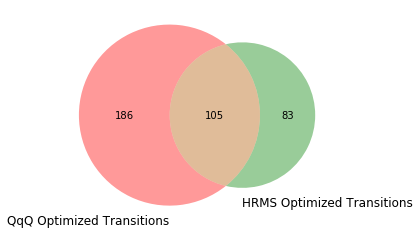

In [8]:
sharedInds = []
QqQ_trans = []
HRMS_trans = []

for index,row in evaluation_results.iterrows():
    if not (pd.isna(row["QqQ Optimized CE"]) or pd.isna(row["HRMS Optimized CE (converted)"])):
        sharedInds.append(index)
    if not pd.isna(row["QqQ Optimized CE"]):
        QqQ_trans.append(index)
    if not pd.isna(row["HRMS Optimized CE (converted)"]):
        HRMS_trans.append(index)
print(len(sharedInds))
filt = evaluation_results.loc[sharedInds,:]

venn2([set(QqQ_trans),set(HRMS_trans)],set_labels=["QqQ Optimized Transitions","HRMS Optimized Transitions"])


Text(0.5, 1.0, 'Evaluation Cpds: R2 = 0.75')

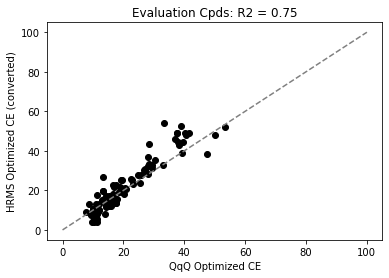

In [9]:
plt.scatter(filt["QqQ Optimized CE"],filt["HRMS Optimized CE (converted)"],c="black")
plt.plot([0,100],[0,100],linestyle="--",c="grey")
plt.xlabel("")
plt.xlabel("QqQ Optimized CE")
plt.ylabel("HRMS Optimized CE (converted)")
r2 = r2_score(filt["QqQ Optimized CE"],filt["HRMS Optimized CE (converted)"])
plt.title("Evaluation Cpds: R2 = "+str(np.round(r2,2)))